### Import Amex-01

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('F:/_Databestanden/amex_one.csv')

In [3]:
df.shape

(5635, 191)

In [9]:
df.head()

,unnamed: 0,customer_id,s_2,p_2,d_39,b_1,b_2,r_1,s_3,d_41,...,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145
0,19190,00e6b0939afa2548eb3cf5b6b052dd176499856a115cfb...,2018-02-23,0.973291,0.244723,0.017692,1.003153,0.000864,0.116674,0.000767,...,NaN,NaN,NaN,0.005018,0.009312,0.009102,NaN,0.007274,0.007641,0.000058
1,9539,00726bc2a559f3f66d9706eb3a8d4bc2c15e636752a0f3...,2018-02-12,0.348496,0.034747,0.313939,0.055277,0.005402,0.321969,0.005840,...,0.258054,0.002846,0.005948,0.007326,0.002038,0.008465,NaN,0.001933,0.007936,0.003655
2,8502,00674acb4cd51fd35dd5424b77fcd9b9abef59f78f1bf7...,2017-06-03,0.636157,0.007966,0.314317,0.175274,0.004513,0.543494,0.006298,...,NaN,NaN,NaN,0.006381,0.006165,0.000559,NaN,0.006466,0.002490,0.006148
3,4210,0034cd7fb57a114eb31e360664aa861bad6634c227437f...,2017-08-23,0.874751,0.008741,0.009354,0.810007,0.006064,0.145281,0.004608,...,NaN,NaN,NaN,1.000512,0.003106,0.933656,0.361338,1.008019,0.669240,0.097461
4,9949,00774cde32a3a8894c5274e49092252b0d78cc49bffbb8...,2017-07-28,0.575609,0.500858,0.424204,0.040389,0.004440,0.310467,0.005908,...,NaN,NaN,NaN,0.008616,0.003953,0.000482,NaN,0.005727,0.006503,0.001129


In [5]:
df.isna().sum()

Unnamed: 0        0
customer_ID       0
S_2               0
P_2              47
D_39              0
               ... 
D_141           101
D_142          4663
D_143           101
D_144            36
D_145           101
Length: 191, dtype: int64

In [ ]:
df.describe()

In [6]:
df.columns = df.columns.str.lower()

In [ ]:
# df[comma] = round(df[comma],2)

### Basic EDA

### Map labels to training data and add to df

In [7]:
train_label = pd.read_csv('D:/_Databestanden/source/train_labels.csv')

In [8]:
train_label.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [11]:
my_dict = train_label.set_index('customer_ID').to_dict()['target']

In [12]:
df['target'] = df['customer_id'].map(my_dict)

In [13]:
df.head()

,unnamed: 0,customer_id,s_2,p_2,d_39,b_1,b_2,r_1,s_3,d_41,...,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,target
0,19190,00e6b0939afa2548eb3cf5b6b052dd176499856a115cfb...,2018-02-23,0.973291,0.244723,0.017692,1.003153,0.000864,0.116674,0.000767,...,NaN,NaN,0.005018,0.009312,0.009102,NaN,0.007274,0.007641,0.000058,0
1,9539,00726bc2a559f3f66d9706eb3a8d4bc2c15e636752a0f3...,2018-02-12,0.348496,0.034747,0.313939,0.055277,0.005402,0.321969,0.005840,...,0.002846,0.005948,0.007326,0.002038,0.008465,NaN,0.001933,0.007936,0.003655,1
2,8502,00674acb4cd51fd35dd5424b77fcd9b9abef59f78f1bf7...,2017-06-03,0.636157,0.007966,0.314317,0.175274,0.004513,0.543494,0.006298,...,NaN,NaN,0.006381,0.006165,0.000559,NaN,0.006466,0.002490,0.006148,1
3,4210,0034cd7fb57a114eb31e360664aa861bad6634c227437f...,2017-08-23,0.874751,0.008741,0.009354,0.810007,0.006064,0.145281,0.004608,...,NaN,NaN,1.000512,0.003106,0.933656,0.361338,1.008019,0.669240,0.097461,0
4,9949,00774cde32a3a8894c5274e49092252b0d78cc49bffbb8...,2017-07-28,0.575609,0.500858,0.424204,0.040389,0.004440,0.310467,0.005908,...,NaN,NaN,0.008616,0.003953,0.000482,NaN,0.005727,0.006503,0.001129,1


### Set correct dtypes

In [15]:
# df.dtypes

unnamed: 0       int64
customer_id     object
s_2             object
p_2            float64
d_39           float64
                ...   
d_142          float64
d_143          float64
d_144          float64
d_145          float64
target           int64
Length: 192, dtype: object

In [16]:
# cols = ['b_30', 'b_38', 'd_114', 'd_116', 'd_117', 'd_120', 'd_126', 'd_63', 'd_64', 'd_66', 'd_68']

In [17]:
# df[cols] = df[cols].astype('category')

In [18]:
df.to_csv('F:/_Databestanden/amex_sample.csv')

### EDA histogram plot

In [ ]:
for col in df.columns:
    df[col].plot(kind='bar')
    plt.title(col)
    plt.show()

### Import a 33GB file
https://medium.com/aatomz-research/how-did-i-convert-the-33-gb-dataset-into-a-3-gb-file-using-pandas-b21d8da205c0

In [1]:
import pandas as pd
import gc
import glob
import os

In [ ]:
chunk_size=500000
num=1
for chunk in pd.read_csv('F:/_Databestanden/test_data.csv',chunksize=chunk_size):
    chunk.to_csv('chunk'+str(num)+'.csv',index=False)
    gc.collect()
    num+=1

In [ ]:
df = pd.read_csv('chunk2.csv')
df.head()

In [ ]:
df.info()

In [ ]:
path = r'F:\_Databestanden\chunks_amex'
all_files = glob.glob(os.path.join(path, "*.csv"))
grouped_files = []

for filename in all_files:
    chunk = pd.read_csv(filename, index_col=None, header=0)
    print(chunk.memory_usage().sum()/1024**3)
    for col in chunk.columns:
        if chunk[col].dtype == 'float64':
            chunk[col] = chunk[col].astype('float16')
        if chunk[col].dtype == 'int64':
            chunk[col] = chunk[col].astype('int8')
    gc.collect()
    grouped_files.append(chunk)

    df = pd.concat(grouped_files, axis=0, ignore_index=True)
    print(df.memory_usage().sum()/1024**3)

In [ ]:
df.to_feather("optimised_amex.feather")

In [ ]:
df = pd.read_feather('optimised_amex.feather')
df.head()

In [ ]:
df1.dtypes.value_counts()

### Separate step: check 4 samples and try to balance them

In [5]:
train1 = pd.read_csv('D:/_Databestanden/samples/df_sample_500.csv')
train2 = pd.read_csv('D:/_Databestanden/samples/df_sample_501.csv')
train3 = pd.read_csv('D:/_Databestanden/samples/df_sample_502.csv')
train4 = pd.read_csv('D:/_Databestanden/samples/df_sample_503.csv')

In [6]:
train4.head()

,Unnamed: 0,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,1851,0017039b6f3eceb538de3d312f77028bf274cf61f992a3...,2017-04-30,0.790588,0.000587,0.179299,0.087905,0.009421,1.496560,0.000029,...,NaN,NaN,0.007027,0.004346,0.007805,NaN,0.004064,0.009832,0.002686,0
1,11808,008d362e5f04f2830a77b683d4f8e5f1bc95d584826ebd...,2017-11-18,0.905534,0.004934,0.017092,1.001321,0.001382,0.174529,0.007555,...,NaN,NaN,0.007343,0.008283,0.006358,NaN,0.003868,0.000511,0.005138,0
2,11964,008ebb1d6a19e19cfb1289fcf5f76745b82e204c125775...,2018-01-07,0.784520,0.387071,0.064299,1.009128,0.004430,0.070870,0.000098,...,NaN,NaN,0.002206,0.002395,0.001321,NaN,0.007708,0.008844,0.006575,0
3,3540,002b930ad6a7e6551482b48a4dbf0f43003e80877f7224...,2017-12-17,0.517841,0.000040,0.022175,1.000154,0.001345,0.171985,0.009663,...,NaN,NaN,0.000727,0.001603,0.009232,NaN,0.009030,0.002474,0.003869,0
4,20473,00f63162232baf77c67e25c829b97decfa15ca3cff3a05...,2017-11-25,0.782171,0.002913,0.000985,0.818735,0.004165,NaN,0.008046,...,NaN,NaN,1.005608,0.004036,0.971639,0.624976,1.000561,0.746332,0.274960,0


<AxesSubplot:>

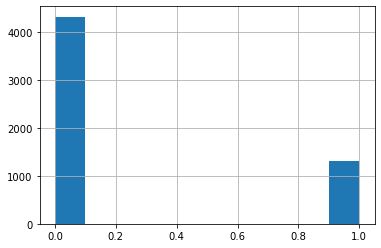

In [7]:
train1['target'].hist()

In [8]:
train1['target'].value_counts()

0    4321
1    1314
Name: target, dtype: int64

In [9]:
train1['target'].value_counts()[0]

4321

In [10]:
train1['target'].value_counts()[1] / train1['target'].value_counts()[0]

0.3040962740106457

In [11]:
train2['target'].value_counts()[1] / train2['target'].value_counts()[0]

0.31689647113811636

In [12]:
train3['target'].value_counts()[1] / train3['target'].value_counts()[0]

0.3305785123966942

In [13]:
train4['target'].value_counts()[1] / train4['target'].value_counts()[0]

0.3290094339622642